In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import zipfile
import pickle
from os.path import join as path, dirname
try:
    from IPython.core.display import HTML

    def pprint(df):
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(HTML(pd.DataFrame(df).to_html()))
except:
    def pprint(df):
        print(df)

# DATA VISUALIZATION

In [14]:
print('Training data:')
df_train = pd.read_csv(path('data', 'train.csv'), index_col='PassengerId')
print(df_train.shape)
pprint(df_train.head())


print('Test data:')
df_test = pd.read_csv(path('data', 'test.csv'), index_col='PassengerId')
print(df_test.shape)
pprint(df_test.head())

Training data:
(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test data:
(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
print("TRAIN: ")
print(df_train.describe())
print()
print("TEST: ")
print(df_test.describe())

TRAIN: 
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

TEST: 
           Pclass         Age       SibSp       Parch        Fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   14.181209    0.896760    0.981429   55.907576
min      1.000000 

In [16]:
print("TRAIN: ")
print(df_train.isna().sum())
print()
print("TEST: ")
print(df_test.isna().sum())

TRAIN: 
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

TEST: 
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


C:\Users\usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


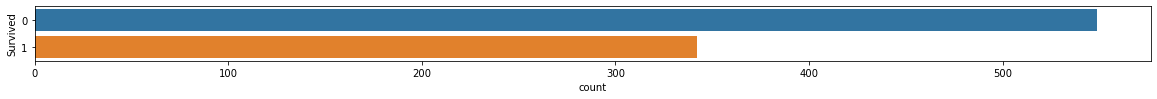

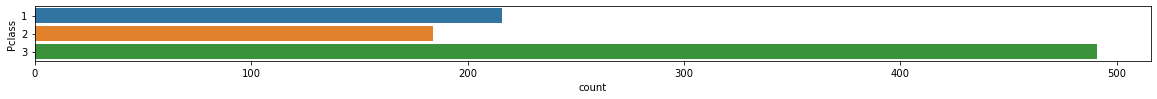

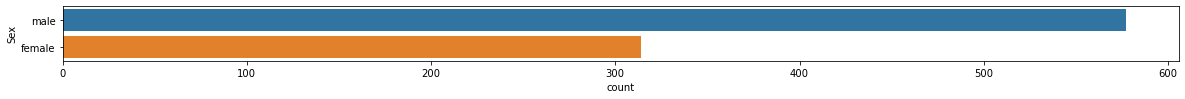

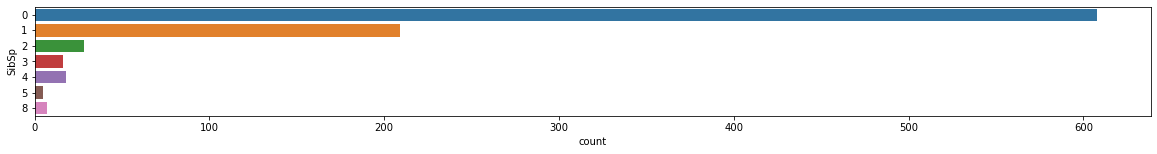

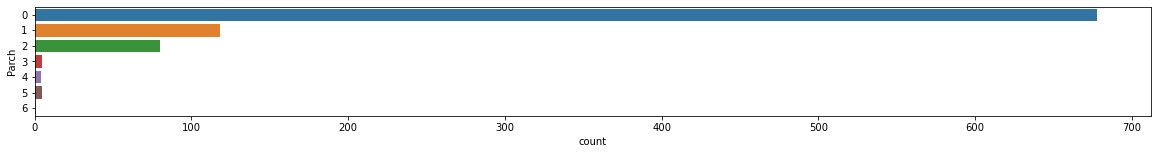

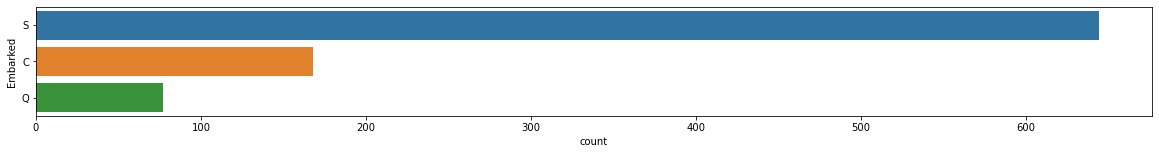

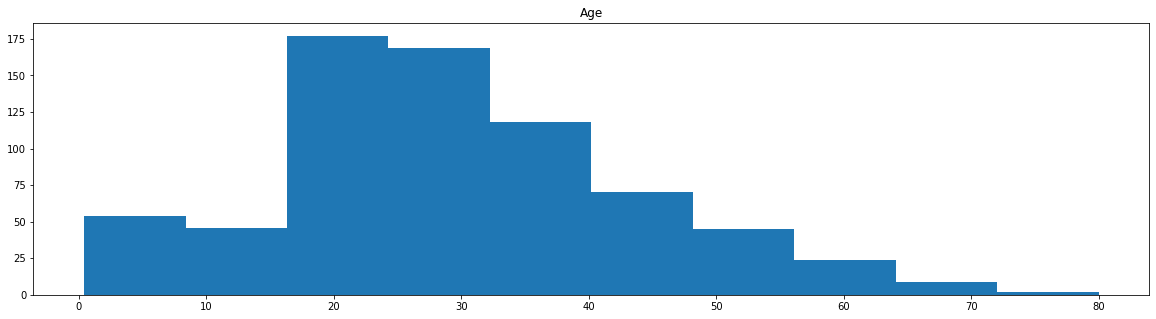

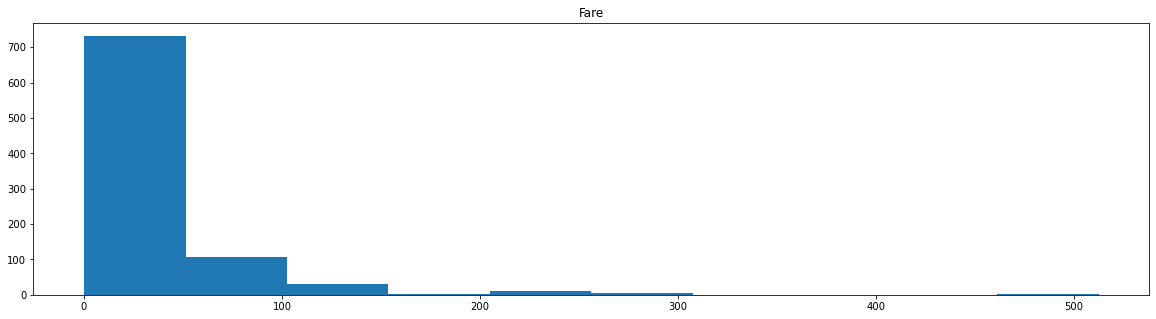

In [17]:
def plot_df(df):
    if("Survived" in df.columns):
        fig = plt.figure(figsize=(20,1))
        sns.countplot(y='Survived', data=df);
    
    fig = plt.figure(figsize=(20,1))
    sns.countplot(y='Pclass', data=df);
    
    fig = plt.figure(figsize=(20,1))
    sns.countplot(y='Sex', data=df);
    
    fig = plt.figure(figsize=(20,2))
    sns.countplot(y='SibSp', data=df);
    
    fig = plt.figure(figsize=(20,2))
    sns.countplot(y='Parch', data=df);
    
    fig = plt.figure(figsize=(20,2))
    sns.countplot(y='Embarked', data=df);

    fig = plt.figure(figsize=(20,5))
    plt.hist(df["Age"])
    plt.title("Age")
    
    fig = plt.figure(figsize=(20,5))
    plt.hist(df["Fare"])
    plt.title("Fare")
plot_df(df_train)

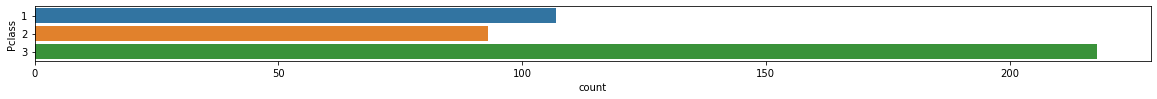

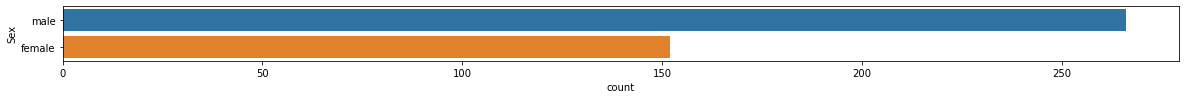

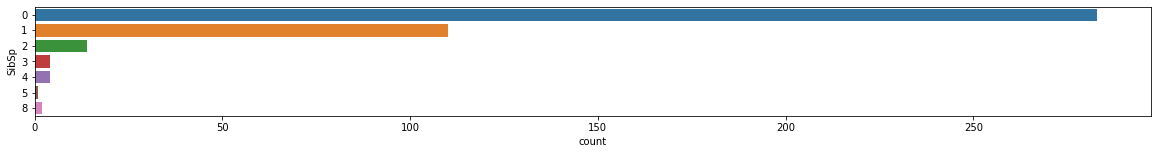

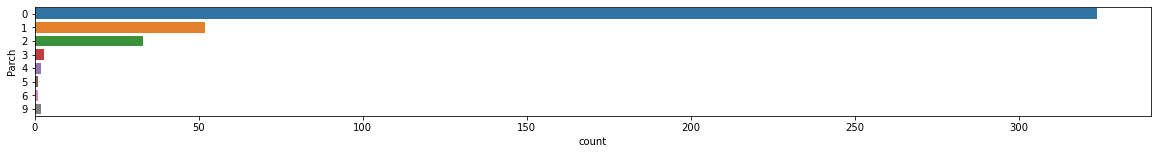

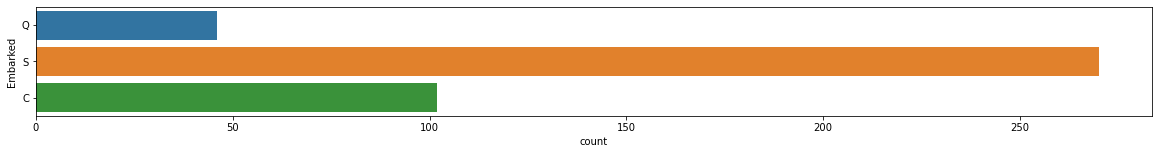

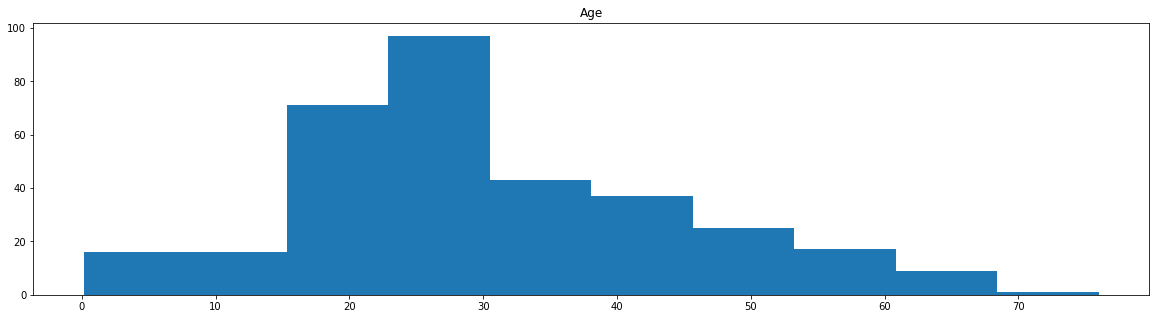

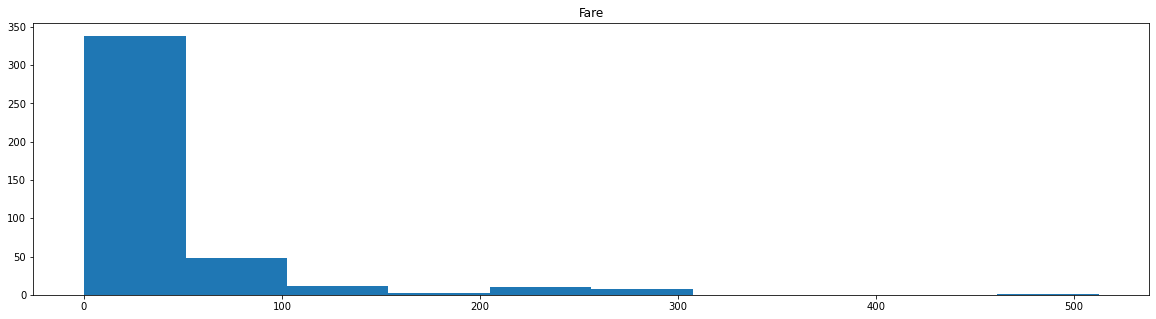

In [18]:
plot_df(df_test)

# CODE

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [49]:
def prepare_df(df):
    df_copy = df.copy()
    df_copy = df_copy.drop(["Name", "Age", "Ticket", "Cabin"], axis=1)
    
    df_copy.loc[(df_copy["Sex"] == "male"), "Sex"]=0
    df_copy.loc[(df_copy["Sex"] == "female"), "Sex"]=1
    
    df_copy.loc[(np.isnan(df_copy["Fare"])), "Fare"]=df_copy["Fare"].mean()
    
    df_pclass = pd.get_dummies(df_copy["Pclass"], prefix="Pclass")
    df_sex = pd.get_dummies(df_copy["Sex"], prefix="Sex")
    df_emb = pd.get_dummies(df_copy["Embarked"], prefix="Embarked")
    
    df_copy = pd.concat([df_copy, df_pclass, df_sex, df_emb], axis=1)
    df_copy = df_copy.drop(["Pclass", "Sex", "Embarked"], axis=1)
    return df_copy

In [50]:
x_train = prepare_df(df_train)
y_train = x_train["Survived"]
x_train = x_train.drop(["Survived"], axis=1)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model = model.fit(x_train, y_train)

test = prepare_df(df_test)
preds = model.predict(test)

In [51]:
results = pd.Series(preds)

results.index.name = 'PassengerId'
results.index = test.index
results.name = 'Survived'
results.to_frame().to_csv('submission.csv')

In [52]:
best_submission = pd.read_csv("best_submission.csv", index_col='PassengerId')
print(type(best_submission["Survived"]))
for item, value in best_submission["Survived"].iteritems():
    if (item != "Survived"):
        if(value != results.loc[item]):
            print("Diferencia")

<class 'pandas.core.series.Series'>
